#### Analisi Esplorativa
###### Pacchetti 

In [5]:
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import rcParams
from matplotlib import pyplot

#### Info Dataset
###### Il dataset è composto da 377368 osservazioni e 43 variabili
###### 

In [6]:
df = pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Mery\Statistical consulting\Churn_Banking_Modeling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377369 entries, 0 to 377368
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id_Cliente                           377369 non-null  int64  
 1   Flag_Richiesta_Estinzione_cc         377369 non-null  object 
 2   Imp_Valore_del_Cliente               377369 non-null  float64
 3   Flag_Apertura_Conto_Online           377369 non-null  int64  
 4   Flag_Possesso_piu_Conti              377369 non-null  int64  
 5   Eta                                  377362 non-null  float64
 6   Provincia_Domicilio                  356181 non-null  object 
 7   Provincia_Residenza                  357897 non-null  object 
 8   Anno_Apertura_primo_Conto            377369 non-null  float64
 9   Professione                          341172 non-null  object 
 10  Imp_Reddito                          157476 non-null  object 
 11  Tipologia_Cli

###### Molte delle variabili binarie presentano un formato non adeguato, per cui le abbiamo trasformate in tipo "object".


In [7]:

for col in df.columns:
    if col.startswith('Flag'):
        df[col] = df[col].astype('object')


numeric_variables_count = len(df.select_dtypes(include=['number']).columns)
categorical_variables_count = len(df.select_dtypes(include=['object']).columns)

print("number of numeric features",numeric_variables_count)
print("number of categorical features",categorical_variables_count)
print(df.info())

number of numeric features 22
number of categorical features 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377369 entries, 0 to 377368
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id_Cliente                           377369 non-null  int64  
 1   Flag_Richiesta_Estinzione_cc         377369 non-null  object 
 2   Imp_Valore_del_Cliente               377369 non-null  float64
 3   Flag_Apertura_Conto_Online           377369 non-null  object 
 4   Flag_Possesso_piu_Conti              377369 non-null  object 
 5   Eta                                  377362 non-null  float64
 6   Provincia_Domicilio                  356181 non-null  object 
 7   Provincia_Residenza                  357897 non-null  object 
 8   Anno_Apertura_primo_Conto            377369 non-null  float64
 9   Professione                          341172 non-null  object 
 10  Imp_Reddito     

#### Valori mancanti
###### In seguito esamineremo i valori mancanti di alcune variabili.
###### Non verranno apportate particolari modifiche poichè verranno applicati modelli di machine learning che li gestiscono in automatico.

In [8]:
missing_values_count = df.isnull().sum()
print(df.isnull().sum())

Id_Cliente                                  0
Flag_Richiesta_Estinzione_cc                0
Imp_Valore_del_Cliente                      0
Flag_Apertura_Conto_Online                  0
Flag_Possesso_piu_Conti                     0
Eta                                         7
Provincia_Domicilio                     21188
Provincia_Residenza                     19472
Anno_Apertura_primo_Conto                   0
Professione                             36197
Imp_Reddito                            219893
Tipologia_Cliente                           0
Sesso                                       7
Profilo_MIFID                           49257
Imp_Canone_Pricing_cc                   27396
Imp_Bonifici_vs_Competitors            288655
Imp_Bonifici_vs_No_Competitors         176679
Num_Utenze_in_essere                   167432
Flag_Accredito_Stipendio                    0
Imp_Spending_Carta_Credito             164706
Imp_Spending_Bancomat                  176004
Num_Accessi_Sito                  

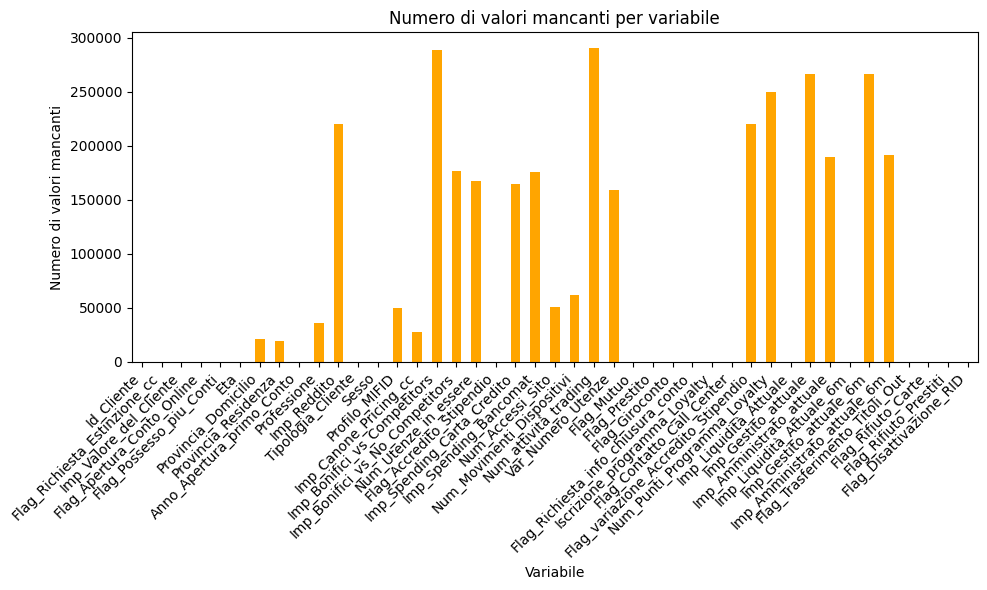

In [9]:
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar',color="orange")
plt.title('Numero di valori mancanti per variabile')
plt.xlabel('Variabile')
plt.ylabel('Numero di valori mancanti')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Variabile target
###### La variabile target considerata è Flag_Richiesta_Estinzione_cc, è una variabile binaria che indica se il cliente richiede l'estinzione del conto bancario.

In [10]:
df["Flag_Richiesta_Estinzione_cc"].describe()

count     377369
unique         2
top           no
freq      375386
Name: Flag_Richiesta_Estinzione_cc, dtype: object

In [11]:
df["Flag_Richiesta_Estinzione_cc"].value_counts()

Flag_Richiesta_Estinzione_cc
no    375386
si      1983
Name: count, dtype: int64

###### Le frequenze delle categorie della target sono fortemente sbilanciate con una percentuale del 99.5 % di clienti che decidono di restare e lo 0.5% di coloro che richiedono l'estinzione del conto.

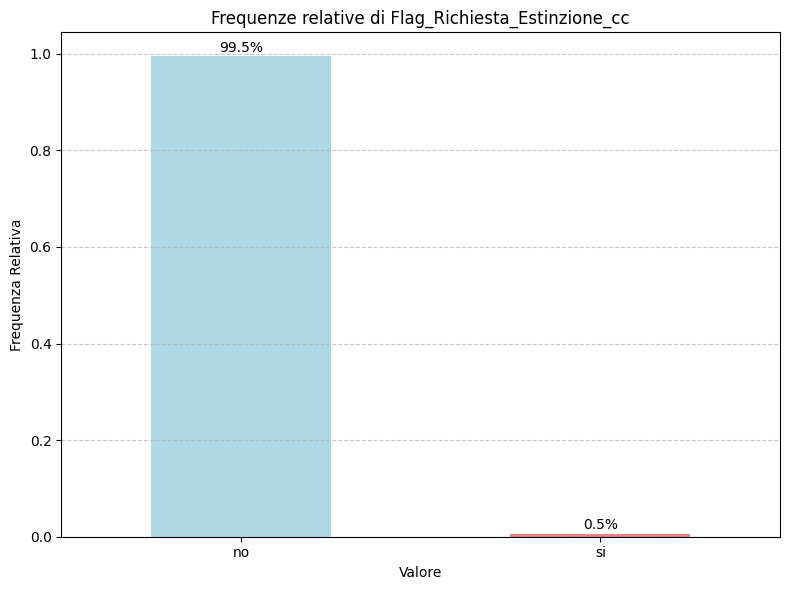

In [12]:
relative_frequencies = df['Flag_Richiesta_Estinzione_cc'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
bars = relative_frequencies.plot(kind='bar', color=['lightblue', 'lightcoral'])

# Aggiungi le percentuali sopra le barre
for i, v in enumerate(relative_frequencies):
    plt.text(i, v + 0.01, f"{v*100:.1f}%", ha='center')

plt.title('Frequenze relative di Flag_Richiesta_Estinzione_cc')
plt.xlabel('Valore')
plt.ylabel('Frequenza Relativa')
plt.xticks(rotation=0)  # Imposta l'angolo di rotazione delle etichette sull'asse x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Aggiunge una griglia sull'asse y
plt.tight_layout()
plt.show()

#### Analisi univariata delle variabili categoriche


###### Le variabili Flag sono tutte binarie, dove 1 indica che è  presente la caratteristica descritta, e 0 indica che quest'ultima non è presente. Ad esempio, per la variabile Flag_Apertura_Conto_Online, circa il 23% dei clienti ha aperto un conto online.
###### La variabile 'Professione' presentava due volte la stessa categoria ' Libero professionista o titolare di impresa', che è stata quindi accorpata in un'unica categoria.
###### La gran parte dei clienti della banca svolge professioni come "Impiegato" e "Libero professionista/Titolare di impresa".
###### La maggior parte dei clienti sono Bankers o Investitors, essi rappresentano circa il 90% dei clienti.

In [13]:

df['Professione'] = df['Professione'].apply(lambda x: 'Ufficiale/Sottoufficiale' if x == 'Ufficiale/Sottufficiale' else 
                                                                  'Libero professionista/Titolare impresa' if x == 'Libero professionista/Titolare di impresa' else 
                                                                  x)
df['Professione'].unique()


array(['Impiegato', 'Altro/Nessuno', 'Quadro', 'Operaio', nan,
       'Ufficiale/Sottoufficiale',
       'Libero professionista/Titolare impresa', 'Dirigente',
       'Commercialista', 'Rappresentante/Agente', 'Ingegnere/Architetto',
       'Avvocato', 'Medico/Farmacista', 'Autotrasportatore',
       'Docente/Insegnante', 'Commesso/Ausiliario', 'Notaio'],
      dtype=object)

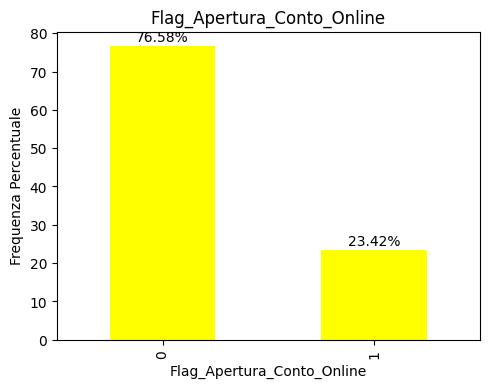

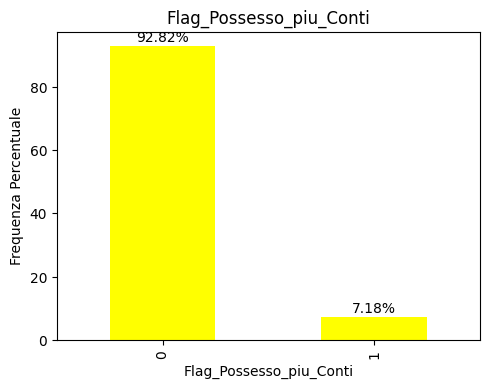

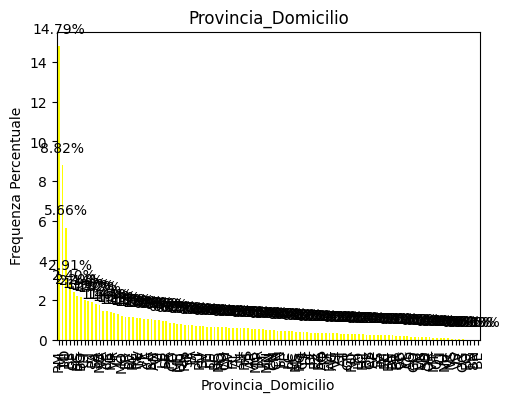

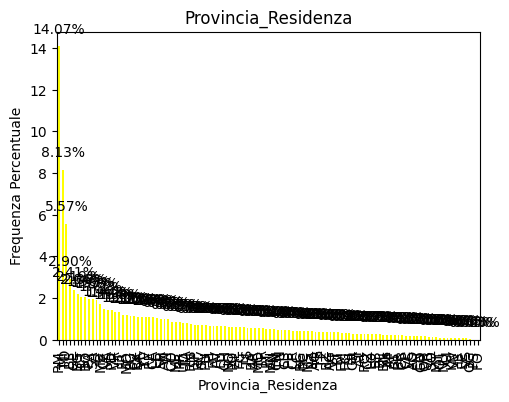

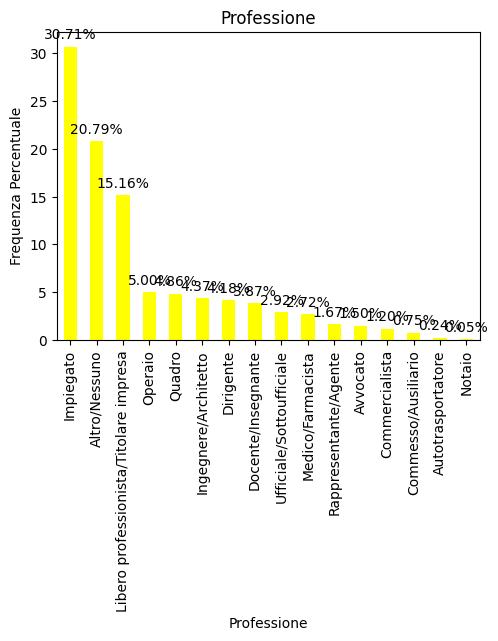

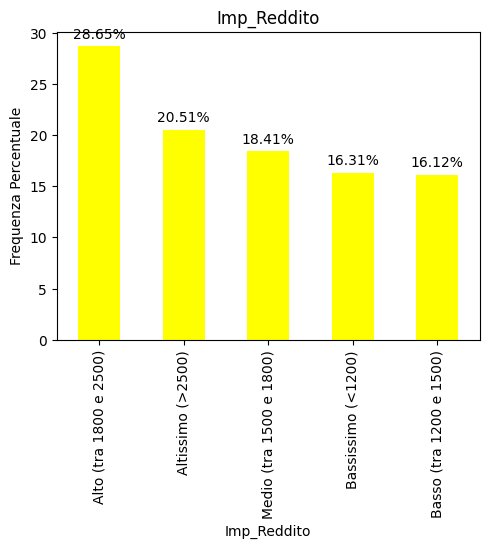

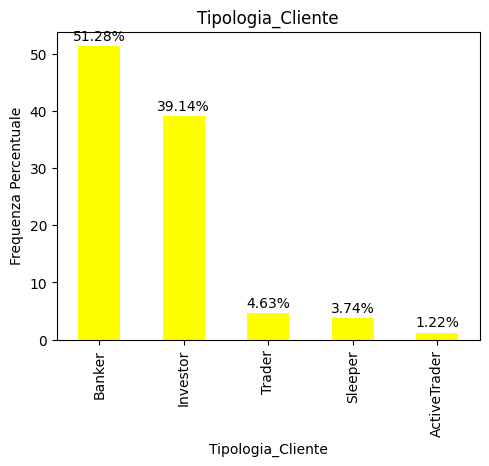

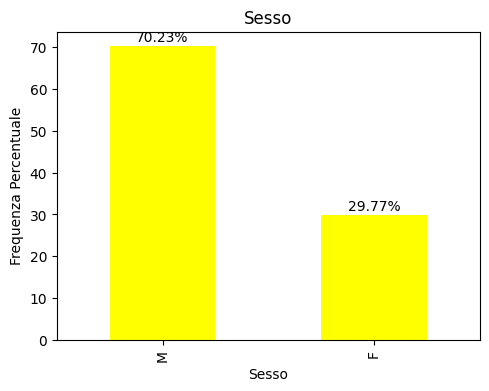

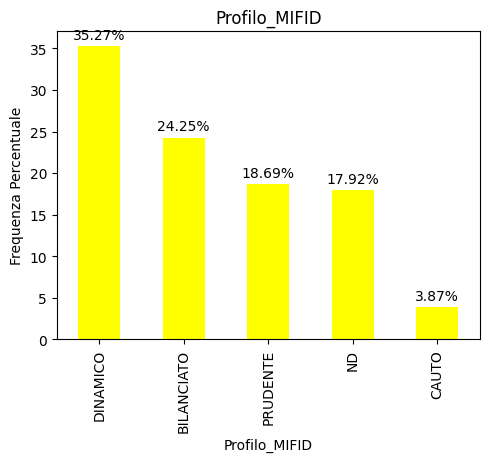

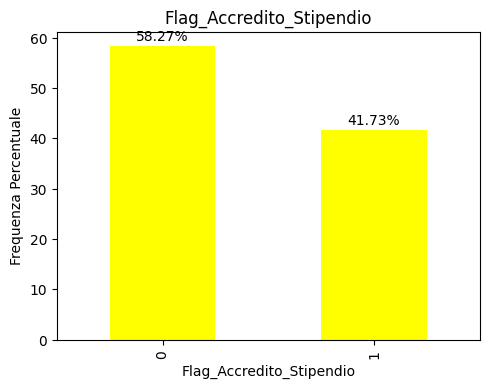

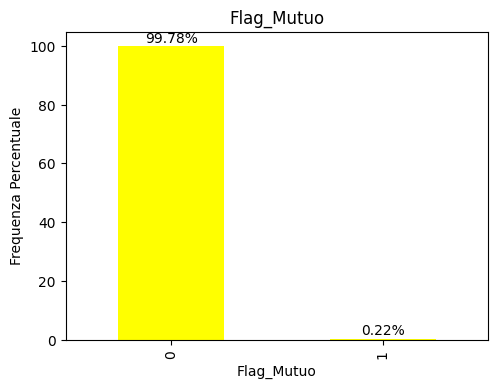

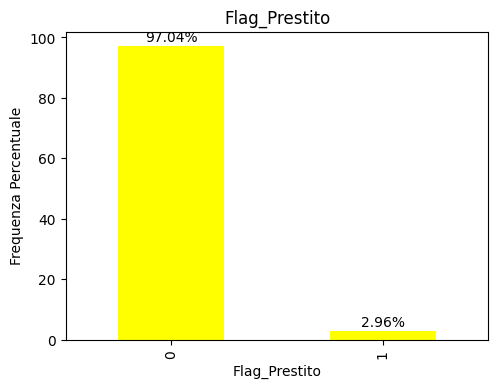

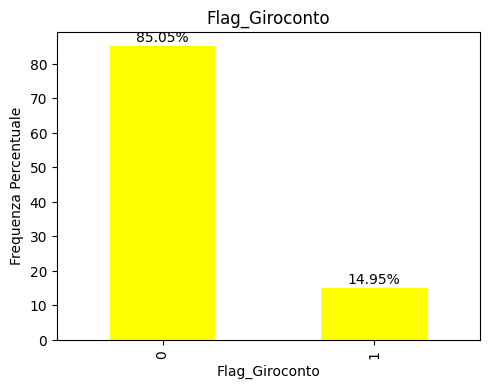

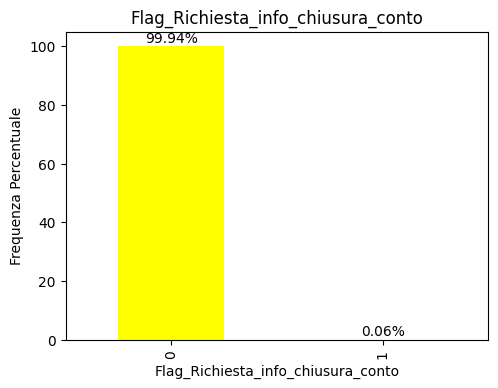

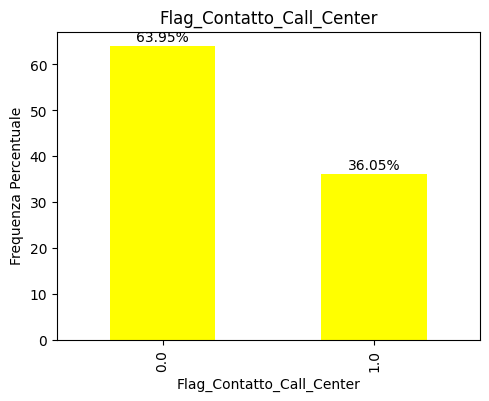

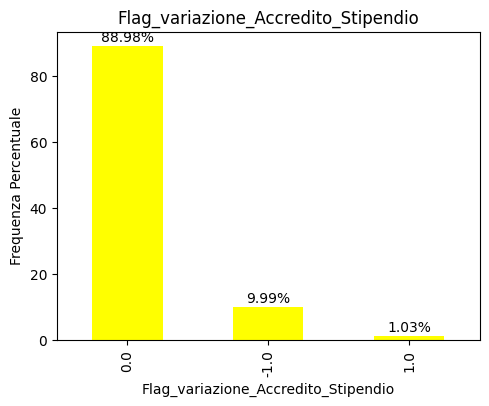

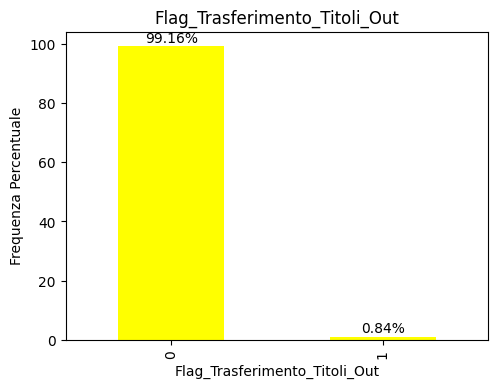

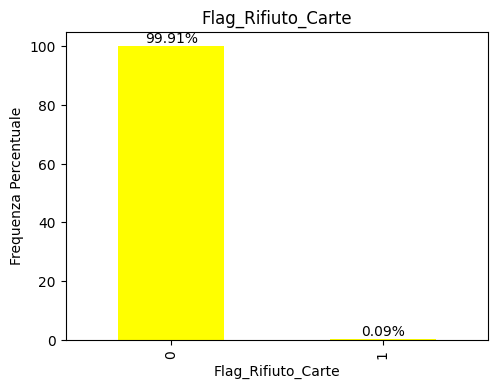

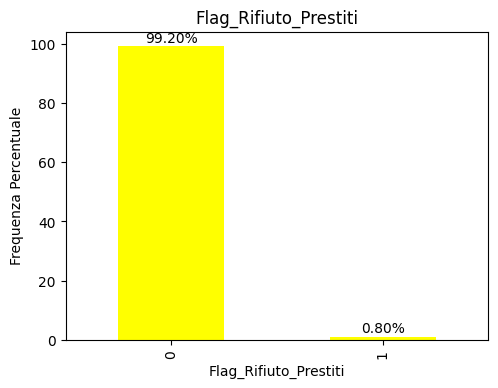

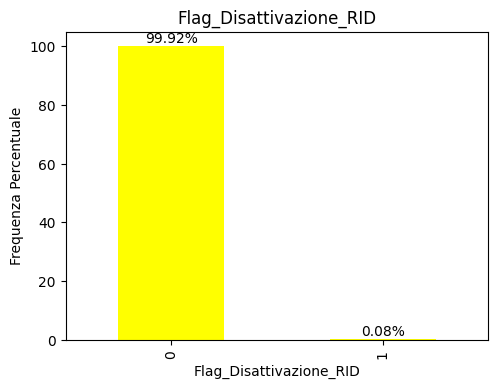

In [14]:
cat_var = df.select_dtypes(include=["object"]).columns.drop("Flag_Richiesta_Estinzione_cc")


for column in cat_var:
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    
    relative_freq = df[column].value_counts(normalize=True)
    
    percent_freq = relative_freq * 100
    percent_freq.plot(kind="bar", color="yellow")
    plt.xlabel(column)
    plt.ylabel("Frequenza Percentuale")
    plt.title(column)
    
    
    for i, v in enumerate(percent_freq):
        plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')
    
    plt.show()



#### Analisi bivariata delle variabili categoriche
###### Vengono analizzate di seguito le variabili categoriche ritenute più interessanti, come ci si poteva aspettare la classe del'no' è sempre maggioritaria rispetto al 'si'.
###### Di seguito si valuta per questo motivo le sole frequenze percentuali delle variabili rispetto alla modalità 'si'

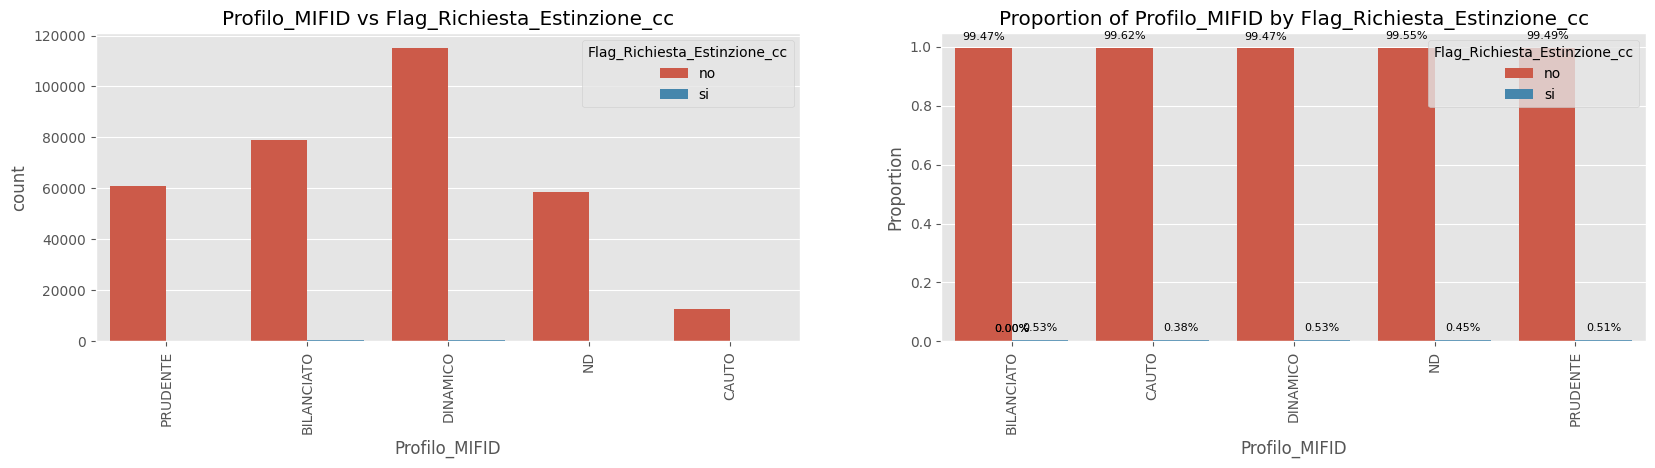

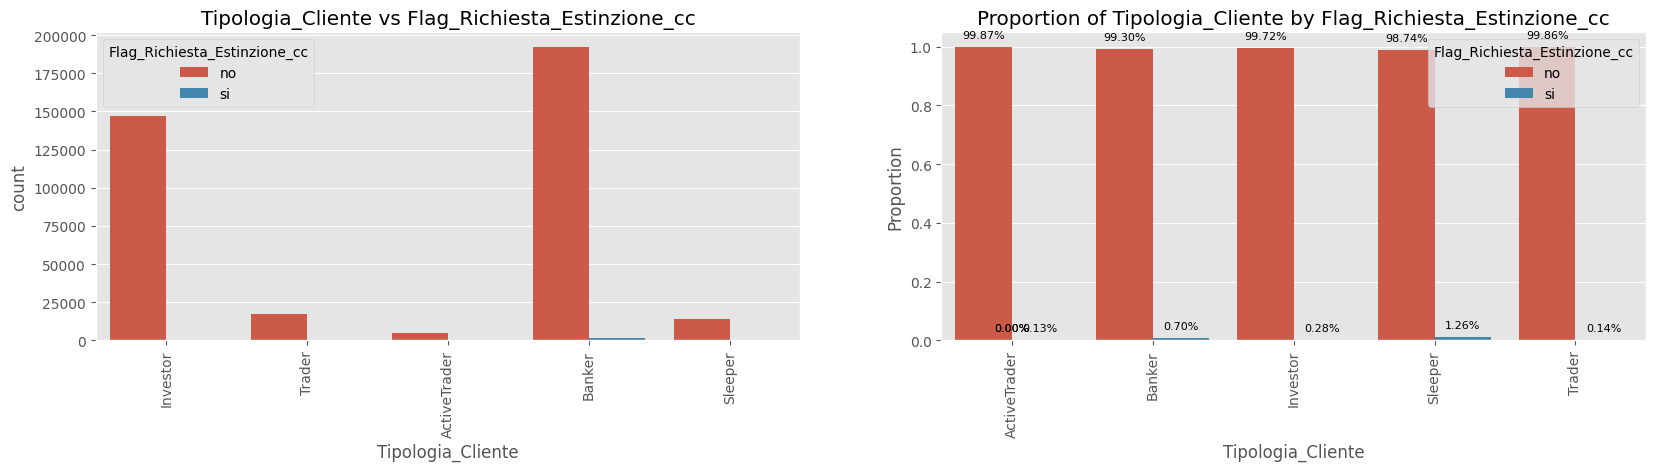

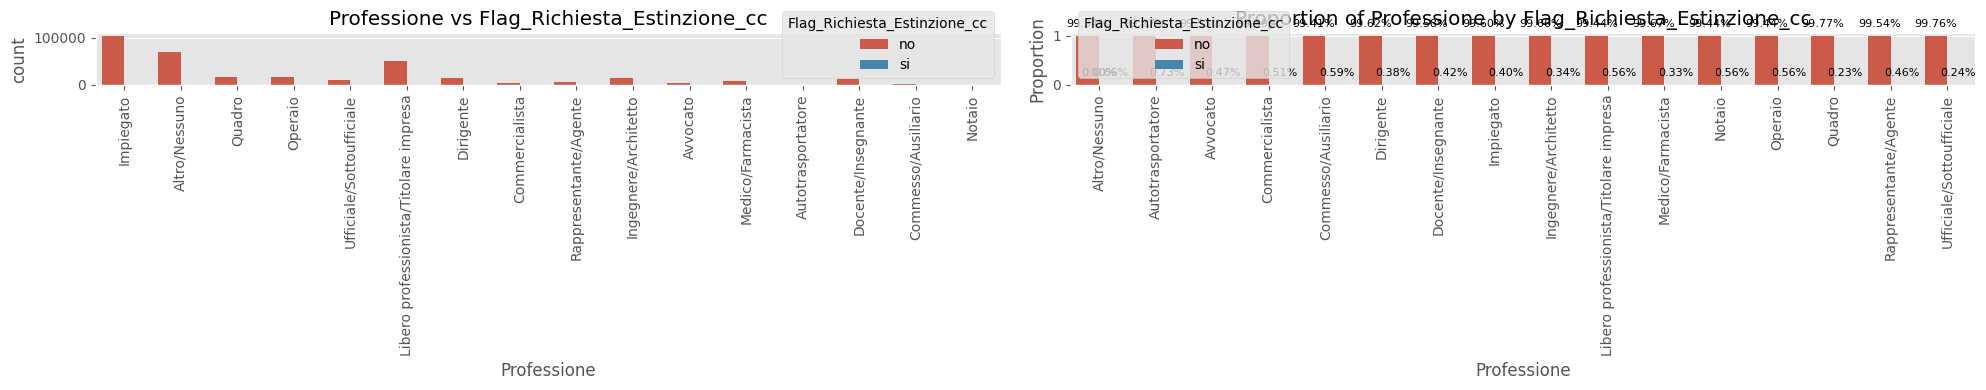

In [28]:
cat_var1 = df[['Profilo_MIFID','Tipologia_Cliente','Professione']]
for column in cat_var1:
    # Crea una nuova figura per ogni variabile categorica
    plt.figure(figsize=(20, 4))
    
    # Plot a sinistra
    plt.subplot(121)
    sns.countplot(data=df, x=column, hue="Flag_Richiesta_Estinzione_cc")
    plt.title(f"{column} vs Flag_Richiesta_Estinzione_cc")
    plt.xticks(rotation=90)

    # Aggiungi un subplot per la proporzione
    plt.subplot(122)
    prop_df = (df.groupby(column)["Flag_Richiesta_Estinzione_cc"]
               .value_counts(normalize=True)
               .rename("prop")
               .reset_index())
    sns.barplot(data=prop_df, x=column, y="prop", hue="Flag_Richiesta_Estinzione_cc")
    plt.title(f"Proportion of {column} by Flag_Richiesta_Estinzione_cc")
    plt.xticks(rotation=90)
    plt.ylabel("Proportion")
    
    # Annotazioni delle percentuali sopra le barre
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                           textcoords='offset points')

plt.tight_layout()
plt.show()

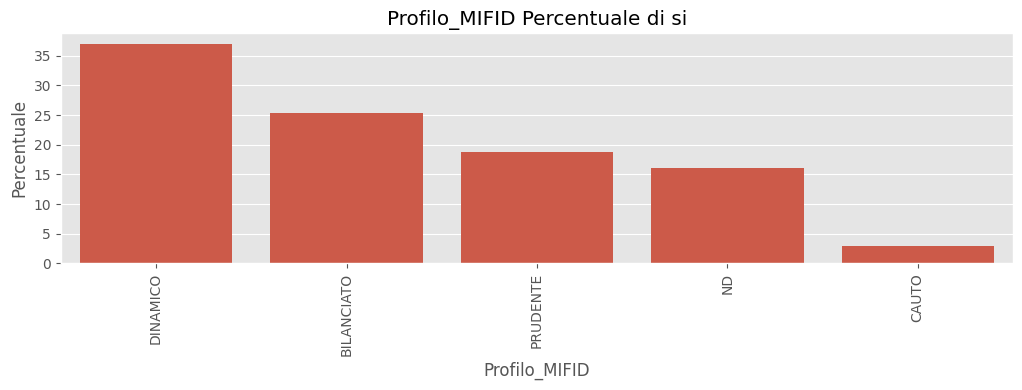

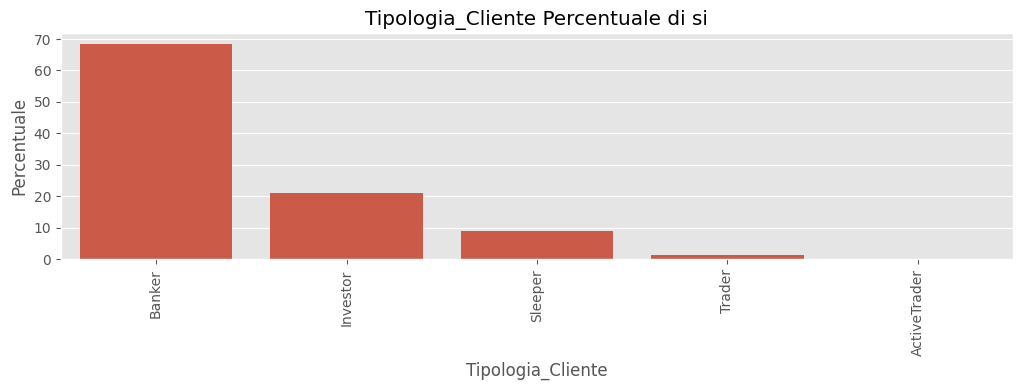

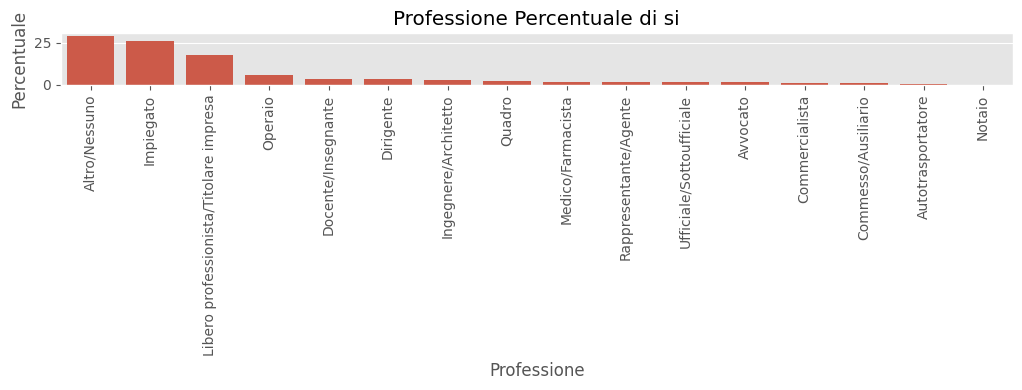

In [35]:
cat_var1 = df[['Profilo_MIFID', 'Tipologia_Cliente', 'Professione']]
target_categories = ['si']  # Solo 'si' per la variabile target

for category in target_categories:
    for column in cat_var1:
        plt.figure(figsize=(20, 4))

        # Calcolo delle frequenze e delle percentuali per la categoria 'si'
        freq_table = df[df['Flag_Richiesta_Estinzione_cc'] == category][column].value_counts()
        total = freq_table.sum()
        percentages = (freq_table / total) * 100

        # Plot a destra
        plt.subplot(122)
        sns.barplot(x=percentages.index, y=percentages.values)
        plt.title(f"{column} Percentuale di {category}")
        plt.xlabel(column)
        plt.ylabel('Percentuale')
        plt.xticks(rotation=90)
        plt.tight_layout()

plt.show()



#### Analisi sulle variabili numeriche
###### Dalla heatmap si può osservare che ci sono poche variabili abbastanza correlate
###### L'importo gestito e l'importo amministrato dalla banca a nome del cliente è più alto per coloro che decidono di non lasciare la banca (tenere conto che queste due variabili presentano molti valori mancanti)


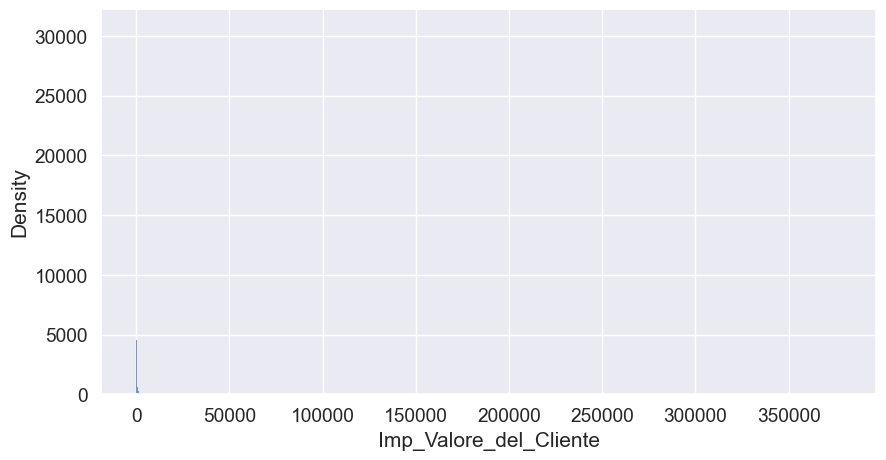

In [73]:
f, ax = plt.subplots(figsize=(10, 5))
s = sns.histplot(df['Imp_Valore_del_Cliente'])
s.set(ylabel='Density')
plt.show()

# Imp_Valore_del_Cliente ha molti 0 ?????????????????????


<Axes: >

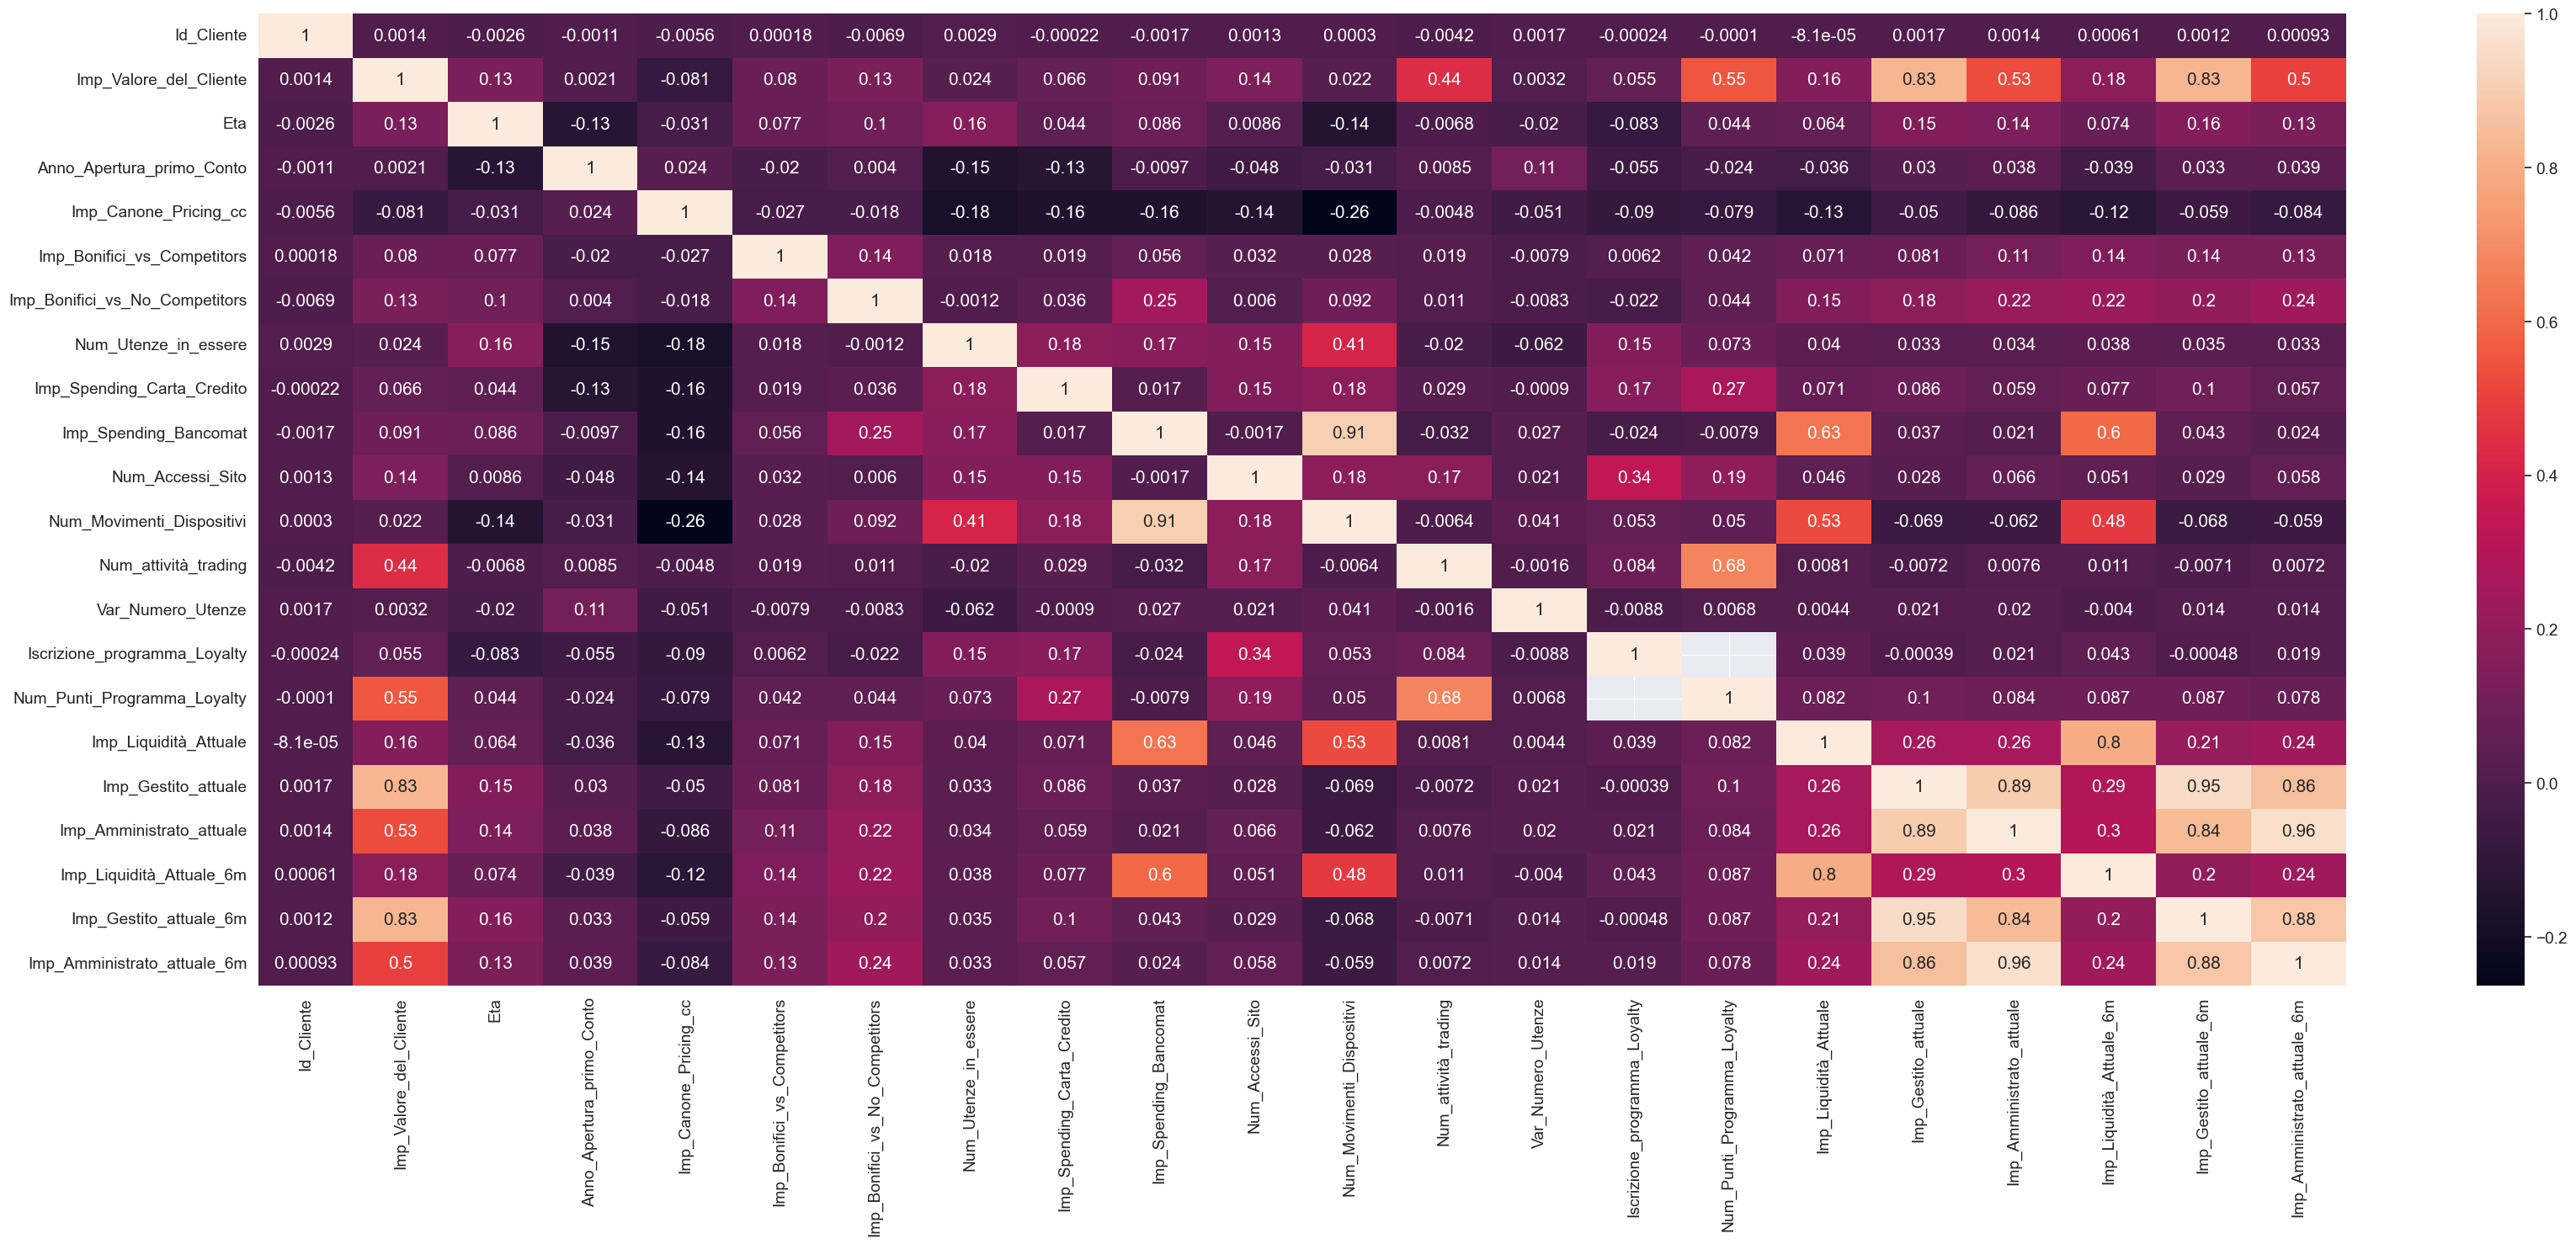

In [51]:
plt.figure(figsize=(40,15))
sns.heatmap(numeric_df.corr(), annot=True)

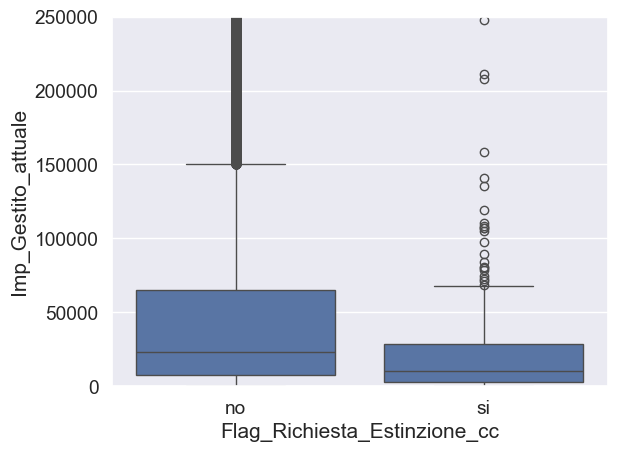

In [63]:
sns.boxplot(x='Flag_Richiesta_Estinzione_cc', y='Imp_Gestito_attuale', data=df)

# Aggiungi label agli assi
plt.xlabel('Flag_Richiesta_Estinzione_cc')
plt.ylabel('Imp_Gestito_attuale')

# Imposta i limiti della scala y per tagliare gli outliers
plt.ylim(0, 250000)  # Modifica i valori dei limiti secondo necessità

# Mostra il boxplot
plt.show()

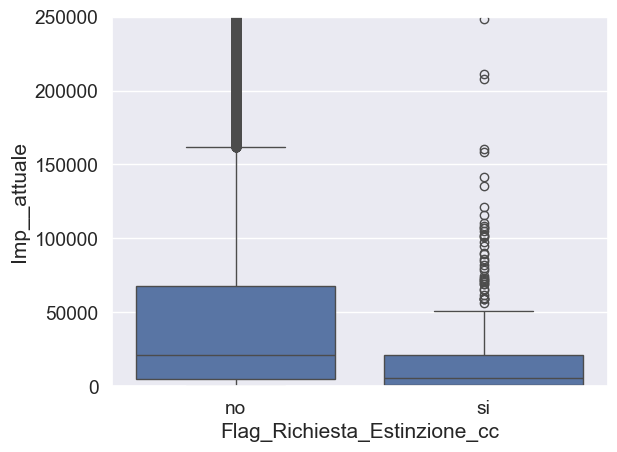

In [62]:
sns.boxplot(x='Flag_Richiesta_Estinzione_cc', y='Imp_Amministrato_attuale', data=df)

# Aggiungi label agli assi
plt.xlabel('Flag_Richiesta_Estinzione_cc')
plt.ylabel('Imp__attuale')

# Imposta i limiti della scala y per tagliare gli outliers
plt.ylim(0, 250000)  # Modifica i valori dei limiti secondo necessità

# Mostra il boxplot
plt.show()

#### Modello 